# RPZ Assignment: K-means

**Detailed BRUTE upload instructions at the end of this notebook.**


## Introduction

The K-means algorithm an *unsupervised* clustering method. Unlike the previous *supervised* methods, which operated with a set of observations and labels $\mathcal{T} = \{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$, unsupervised methods utilize unlabeled observations $\mathcal{T} = \{\mathbf{x}_1, \ldots, \mathbf{x}_n\}$. Their objective is to infer properties of a probability distribution $p_X(\mathbf{x})$.

In low-dimensional spaces ($\text{dim}(\mathbf{x}) \leq 3$), direct estimation of the probability density is feasible using various techniques (e.g. histograms, Parzen windows). Additionally, if prior information about a specific probability distribution type is available, direct estimation of the distribution parameters becomes possible.

However, these methods encounter challenges in higher dimensions due to the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). As dimensionality increases, the volume grows exponentially, leading to increasingly sparse data. In such cases, techniques that describe the data in a more generalized manner, rather than identifying the complete underlying distribution $p_X(\mathbf{x})$, are preferred.

The main groups of unsupervised methods includes:
* dimensionality reduction methods 
* clustering methods

Dimensionality reduction methods aim to map data onto a lower-dimensional manifold while minimizing information loss. Clustering methods involve partitioning observations into groups with minimal differences between the samples within each group.

Unsupervised methods find application in various domains, such as smart feature selection, data visualization, efficient data encoding, adaptive classification, and image segmentation.

### K-means

The K-means algorithm is a widely used clustering approach. Its primary objective is to determine a clustering $\{\mathcal{T}_k\}^K_{k=1}$ of the observations that minimizes the **within-cluster sum of squares (WCSS)**:
$$\{\mathbf{c}_1, \ldots, \mathbf{c}_K; \mathcal{T}_1, \ldots, \mathcal{T}_K\} =  \underset{\text{all }\mathbf{c}^{'}_k, \mathcal{T}^{'}_k} {\operatorname{arg\,min}} \sum_{k=1}^{K} \sum_{\mathbf{x} \in \mathcal{T}^{'}_k} \| \mathbf{x} - \mathbf{c}^{'}_k \|^2_2,$$
where $K$ is a user specified number of clusters, $\mathcal{T}_1,\ldots,\mathcal{T}_K$ are sets of observations belonging to clusters $1,\ldots,K$ and each cluster is represented by its prototype $\mathbf{c}_k$.



#### K-means algorithm

**Input**: set of observations $\mathcal{T} = \{\mathbf{x}_1, \ldots, \mathbf{x}_n\}$, number of clusters $K$, maximum number of iterations.

**Output**: set of cluster prototypes $\{\mathbf{c}_1, \ldots, \mathbf{c}_K\}$.

**Initialize** $\{\mathbf{c}_1, \ldots, \mathbf{c}_K\}$ with random unique input observations $\mathbf{x}_i$.

**Do:**
  1. **Classify** observations $\{\mathbf{x}_l\}^L_{l=1}$ to the cluster represented by the nearest prototype $\{\mathbf{c}_k\}^K_{k=1}$: $$y_l =  \arg\min_{k=1,\ldots,K}\|\mathbf{x}_l - \mathbf{c}_k\|^2_2 \qquad (\forall l = 1,\ldots,L),$$ $$ \mathcal{T}_k = \{\mathbf{x} \in \mathcal{T}: \forall l, y_l = k\} \qquad (\forall k = 1,\ldots,K) $$
  2. **Update** the prototypes $\mathbf{c}_k$ to the mean value of all vectors $\mathbf{x}_l$ belonging to $k$-th class:
$$\mathbf{c}_k = \left\{ \begin{array}{l l} \frac{1}{|\mathcal{T}_k|}\sum_{\mathbf{x} \in \mathcal{T}_k} \mathbf{x} & \text{if}~|\mathcal{T}_k| > 0 \\ \text{re-initialize} & \quad \text{otherwise} \end{array} \right.$$
**Until** no change in clustering $\mathcal{T}_k$ or maximum number of iterations is exceeded.


In [318]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from kmeans import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from numpy import testing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Implement K-means

Your first task is to implement the basic K-means algorithm based on the description provided above. Refer to the template function `k_means` for input details.

Test the algorithm on simple 1D data:

In [319]:
# In order to obtain the same results, use this initialization of the random number generator
# (DO NOT put this into functions submitted to the upload system).
np.random.seed(0) 

x = np.array([[16, 12, 50, 96, 34, 59, 22, 75, 26, 51]])
cluster_labels, centroids, sq_dists = k_means(x, k=3, max_iter=np.inf)

np.testing.assert_array_equal(cluster_labels, [1, 1, 0, 0, 2, 0, 1, 0, 1, 0])
np.testing.assert_array_equal(centroids, [[66, 19, 34]])
np.testing.assert_array_equal(sq_dists, [9.0, 49.0, 256.0, 900.0, 0.0, 49.0, 9.0, 81.0, 49.0, 225.0])

Test on images for limited number of iterations.

In [320]:
np.random.seed(0) 
images = np.load("data_kmeans.npz", allow_pickle=True)["images"]
x = compute_measurements(images)
_, centroids, _ = k_means(x, k=3, max_iter=4)

np.testing.assert_array_almost_equal(centroids, [[330.84821429, -115.04545455, -4566.76], 
                                                 [-2348.99107143, 658.20454545, 2375.78]])

Test and visualise on synthetic 2D data. Try to run the algorithm several times with random initialization. You should meet several runs when the clustering converges to a local optima only.

K-means with K = 4...


Text(0.5, 1.0, 'K-means RESULT (random initialization)')

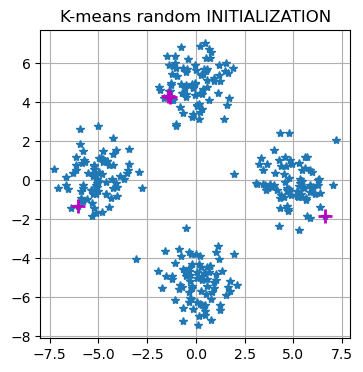

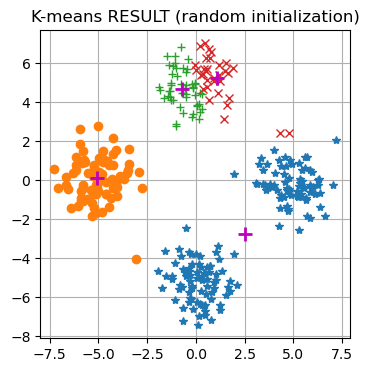

In [321]:
np.random.seed(19)

k = 4
x = gen_kmeanspp_data()
print(f'K-means with K = {k}...')
centroids = x[:, np.random.choice(range(x.shape[1]), k, replace=False)]
show_clusters(x, np.ones([1, x.shape[1]]), centroids)
plt.title('K-means random INITIALIZATION')
plt.savefig('random_initialization.png')

cluster_labels, centroids, _ = k_means(x, k, np.inf, False, centroids)
show_clusters(x, cluster_labels, centroids)
plt.title('K-means RESULT (random initialization)')

Finally, train K-means on real MNIST image dataset and visualize the clusters both in feature space and as a set of images.

K-means, K = 10...


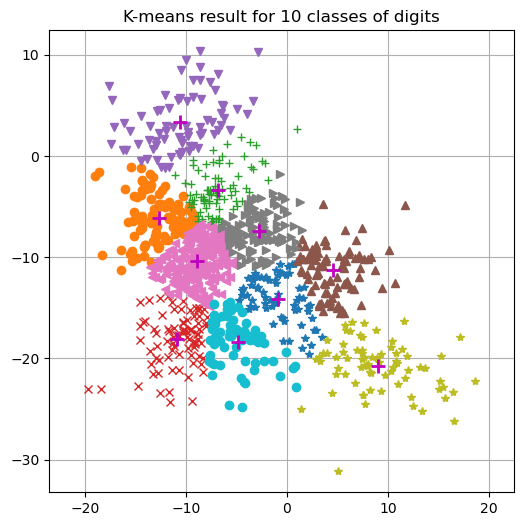

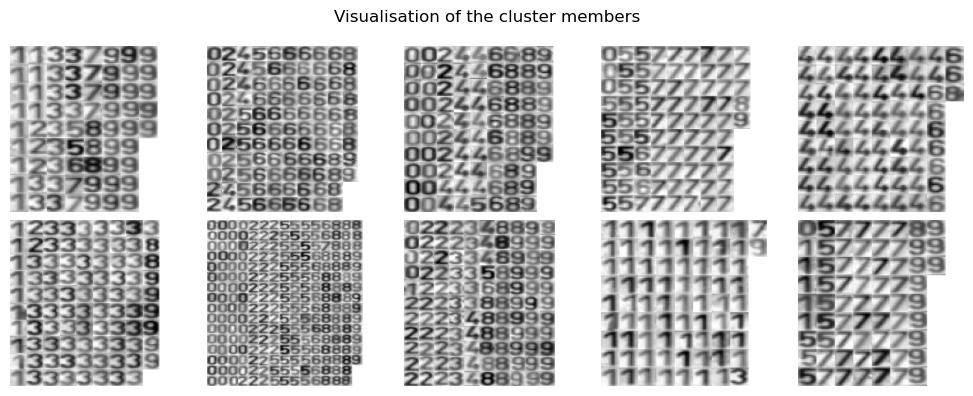

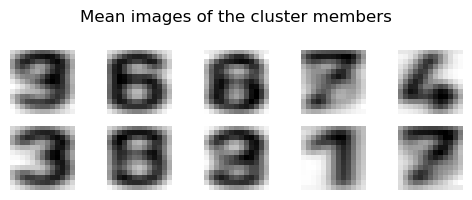

In [322]:
data = np.load("data_numbers_kmeans.npz", allow_pickle=True)
numbers_images = data["images"]

np.random.seed(0)

k = 10
print(f'K-means, K = {k}...')
x = compute_measurements(numbers_images)
cluster_labels, centroids, _ = k_means(x, k, np.inf)
show_clusters(x, cluster_labels, centroids, title='K-means result for 10 classes of digits', figsize=(6,6))

show_clustered_images(numbers_images, cluster_labels, title='Visualisation of the cluster members')
show_mean_images(numbers_images, cluster_labels, title='Mean images of the cluster members')

## Part 2: Avoiding the local minima

The solution that K-means reaches depends on the initialization of the cluster means and there is no guarantee that it reaches the global optimum, as you have seen above.
The chance of getting trapped in a local minimum can be reduced by performing more trials of the K-means clustering and choosing the result that minimizes *WCSS*.

In the following, we will extract measurements from the one of the unlabelled datasets: 

   * `data_kmeans.npz`, which consists of images of three letters - H, L, T (here K = 3) 
   * the MNIST dataset `data_mnist_kmeans.npz` of hand written digits, K = 10

In [323]:
data = np.load("data_letters_kmeans.npz", allow_pickle=True)
letters_images = data["images"]

Implement the function `k_means_multiple_trials(x, k, n_trials, max_iter)` which tries to avoid being trapped in local minimum by performing K-means several times and selecting the solution that minimizes the *WCSS*.

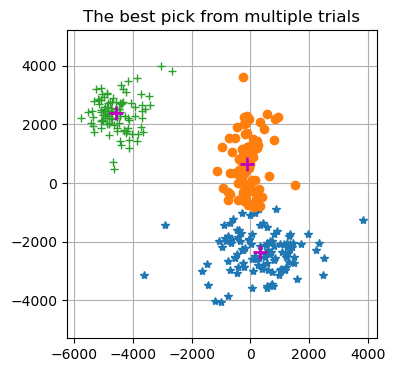

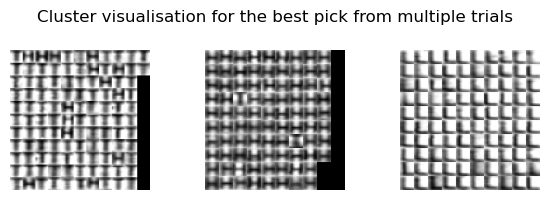

In [324]:
np.random.seed(0)

x = compute_measurements(letters_images)
k = 3
cluster_labels_m, centroids_m, x_dists_m = k_means_multiple_trials(x, k, 10, np.inf, show=False)
show_clusters(x, cluster_labels_m, centroids_m, title='The best pick from multiple trials')
show_clustered_images(letters_images, cluster_labels_m, title='Cluster visualisation for the best pick from multiple trials')

## Part 3: K-means++ initialization

K-means++ is an adaptation of the K-means algorithm that employs smarter initialization of the cluster centers. The motivation is to initialize K-means in such way that it more likely ends in a better local minima (a minima with a lower WCSS).

K-means++ uses the following randomized sampling strategy for constructing the initial cluster centers set $\mathcal{C}$:
1. Choose the first cluster center $\mathbf{c}_1$ uniformly at random from $\mathcal{T}$. Set $\mathcal{C} = \{\mathbf{c}_1\}$. 
2. For each data point $\mathbf{x}_l$, compute the distance $d_l$ to its nearest cluster in $\mathcal{C}$: $$ d_l  = \min_{\mathbf{c}\in \mathcal{C}} \|\mathbf{x}_l - \mathbf{c} \| \qquad (\forall l=1,2,..., L) $$
3. Select a point $\mathbf{x}_l$ from $\mathcal{T}$ with probability proportional to $d^2_l$. This involves constructing a distribution $p(l)$ from $d_l$ as $p(l) = \frac{d_l^2}{\sum_{l=1}^L d_l^2}$ and sampling from it to get the index $l$.
4. $\mathcal{C} \leftarrow \mathcal{C} \cup \mathbf{x}_l$.
5. Stop if $|\mathcal{C}| = K$, otherwise goto 2.

After this initialization, standard K-means algorithm is employed.

### K-means++ implementation

Implement K-means++ initialization. The function `centroids = k_meanspp(x, k)` returns initial cluster prototypes for use in the already implemented K-means algorithm. You will first need to prepare `idx = random_sample(weights)` function that picks a random sample based on the sample weights instead of uniformly. The sampling process works as follows:
1. Normalize the sample weights to get a probability distribution over samples.
2. Generate a random number in the interval (0, 1).
3. Select corresponding sample as shown in the figure below.

Use your `random_sample` function to generate all K-means++ output indexes.

**Note**: Use `random_sample` with all weights set to 1 for choosing the first centroid.

<img src="assets/random_sampling.png" width="750" style="margin-top: 25px;">

In [325]:
# testing the random_sample implementation
np.random.seed(0)
distances = np.array([10, 2, 4, 8, 3])
idx_1 = random_sample(distances)
idx_2 = random_sample(distances)
np.testing.assert_equal(idx_1, 2)
np.testing.assert_equal(idx_2, 3)

In [326]:
# testing the k_meanspp implementation
np.random.seed(0)
x = np.atleast_2d(np.array(range(100)))
centroids = k_meanspp(x, 3)
np.testing.assert_array_equal(centroids, [[54, 82, 15]])

Inspect the K-means++ initialization for the data generated by `gen_kmeanspp_data` and compare it to a uniform random initialization of the vanilla K-means you tested above. You may either run this code multiple times or use the interactive visualization below. The number of bad initializations should be significantly lower compared to the similar experiment with the vanilla K-means. 

However, even using K-means++ does not fully prevent getting stuck in a local optima. One still need to run the algorithm several times and select the solution with the smallest WCSS!

K-means++, K = 4


Text(0.5, 1.0, 'K-means result (K-means++ initialization)')

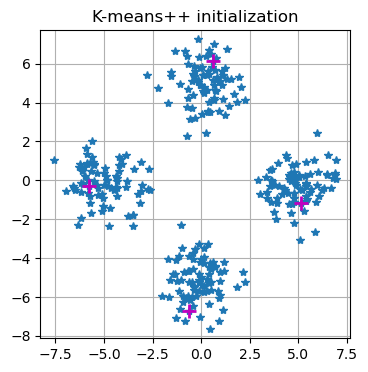

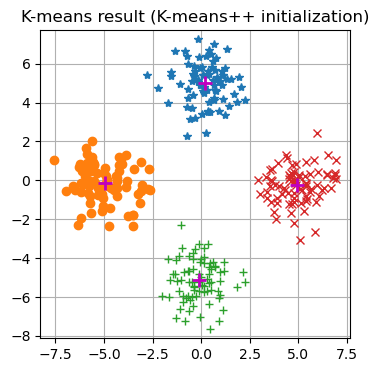

In [327]:
np.random.seed(0)

k = 4
print(f'K-means++, K = {k}')
x = gen_kmeanspp_data()
centroids = k_meanspp(x, k)
show_clusters(x, np.ones([x.shape[1]]), centroids)
plt.title('K-means++ initialization')    

cluster_labels, centroids, _ = k_means(x, k, np.inf, False, centroids)
show_clusters(x, cluster_labels, centroids)
plt.title('K-means result (K-means++ initialization)')

## Part 4: K-means application to color quantization

Apply K-means algorithm to the [color quantization](https://en.wikipedia.org/wiki/Color_quantization) problem. The goal is to reduce the number of distinct colors in an image such that the resulting image is visually close to the source image. Follow the following algorithm:
  - Reshape the input image to (N, 3) and convert it to `np.float64`
  - Randomly select 1000 pixels from the reshaped image (`inds = np.random.randint(0, N-1, 1000)`).
  - Perform K-means clustering on the selected pixels in three-dimensional RGB space (using `k_means` function with `max_iter=float('inf')`, without `k_meanspp` initialization).
  - Replace the RGB value of each image pixel with the nearest cluster centroid RGB.
  - Convert the result to `np.uint8` without rounding it first.

You are supposed to implement a function `im_q = quantize_colors(im, k)` which performs the described color quantization. Run this function on `geeks.png` image and save the resulting quantized version as `geeks_quantized.png`. The right image below is a sample result (for k=8).

**Important (for automatic evaluation):** To generate indices of the 1000 random pixels, use this code: `inds = np.random.randint(0, (h_image * w_image)-1, 1000)`.

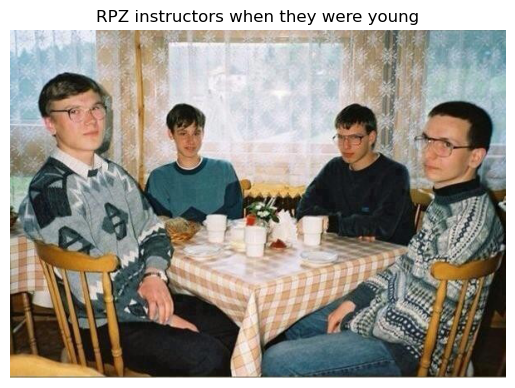

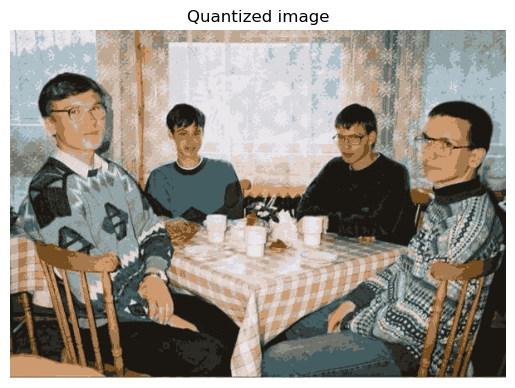

In [328]:
im = (plt.imread('geeks.png') * 255).astype(np.uint8)
plt.imshow(im)
plt.axis('off')
plt.title('RPZ instructors when they were young')

np.random.seed(0)
im_q = quantize_colors(im, 16)

plt.figure()
plt.imshow(im_q)
plt.axis('off')
plt.title('Quantized image')
plt.savefig('geeks_quantized.png')

## Submission to the BRUTE Upload System

To fulfill this assignment, you need to submit these files (all packed in one ''.zip'' file) into the __[upload system](https://cw.felk.cvut.cz/brute/)__:

  - `kmeans.ipynb` - a script for data initialization, calling of the implemented functions and plotting of their results (for your convenience, will not be checked)
  - `kmeans.py` - containing the following implemented methods:
    - `k_means` - a function which implements the K-means algorithm
    - `k_means_multiple_trials` - a function which performs several trials of the K-means clustering algorithm in order to avoid local minima
    - `k_meanspp`, `random_sample` - functions for K-means++ initialization
    - `quantize_colors` - a function which implements color quantization based on K-means
  - `geeks_quantized.png` - images specified in the tasks

When preparing a zip file for the upload system, **do not include any directories**, the files have to be in the zip file root.